In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# printing the first five row
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# the number of rows and columns
df.shape

(614, 13)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there is more nan values. let's deal with data

# Cleaning the data

In [8]:
data=df.dropna()

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df_1=data.drop(columns=['Loan_ID'],axis=1)

In [11]:
df_1.shape

(480, 12)

In [12]:
# Label encoding
df_1.replace({'Loan_status':{'N':0,'Y':1}},inplace=True)

In [13]:
# Dependent column values
df_1['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [14]:
# Replacing the value of 3+ to 4
df_1=df_1.replace(to_replace='3+',value=4)

In [15]:
# Dependents values
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

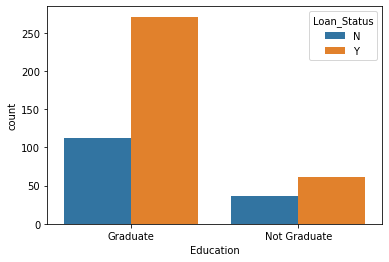

In [16]:
# education and Loan status
sns.countplot(x='Education',hue='Loan_Status',data=df_1)

<AxesSubplot:xlabel='Married', ylabel='count'>

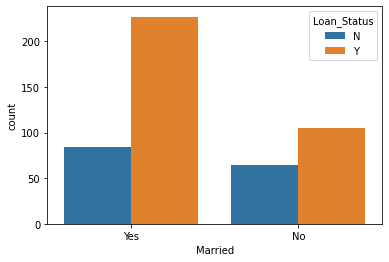

In [17]:
# marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=df_1)

In [18]:
# convert categorical columns to numerical values
data_1=df_1.replace({'Married':{'No':0,'Yes':1},'Gender':{'Female':0,'Male':1},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Not Graduate':0,'Graduate':1},'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [19]:
df_1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [20]:
df_1.shape

(480, 12)

# EDA

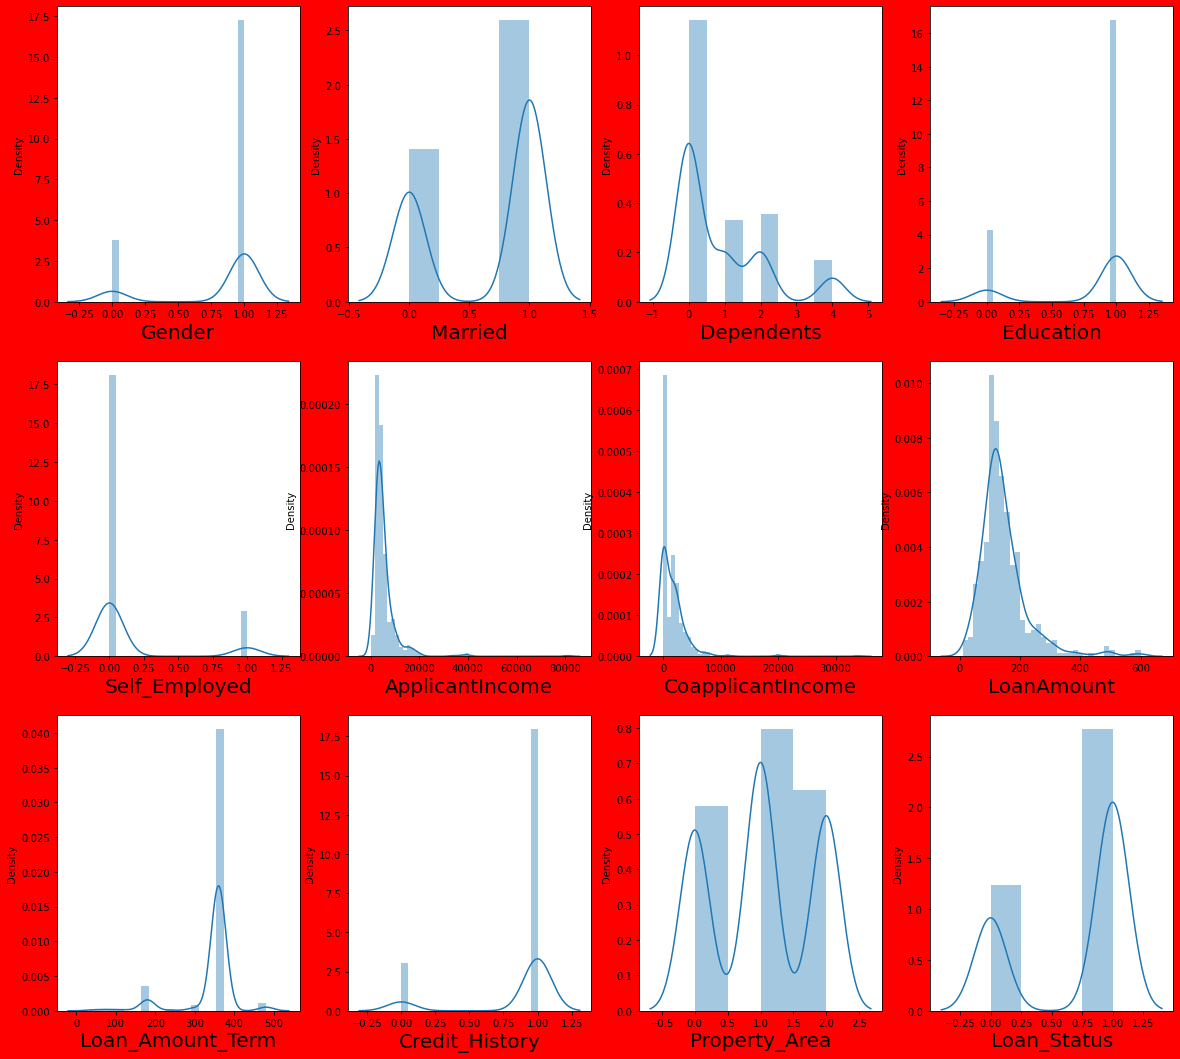

In [21]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='red')
plotnumber = 1


for column in df_1:
    if plotnumber<=12 :  # as there are 12 columns in the data
        ax= plt.subplot(4,4,plotnumber)
        sns.distplot(df_1[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.show()      

In [73]:
# Divide data set into features and label
y=df_1['Loan_Status']
x=df_1.drop(columns=['Loan_Status'])

In [74]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [75]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [25]:
# Data scaling.formula Z=(x-mean)/std
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

In [26]:
x_scaled

array([[ 0.46719815,  0.73716237,  0.11235219, ...,  0.27554157,
         0.41319694, -1.31886834],
       [ 0.46719815,  0.73716237, -0.70475462, ...,  0.27554157,
         0.41319694,  1.25977445],
       [ 0.46719815,  0.73716237, -0.70475462, ...,  0.27554157,
         0.41319694,  1.25977445],
       ...,
       [ 0.46719815,  0.73716237,  0.11235219, ...,  0.27554157,
         0.41319694,  1.25977445],
       [ 0.46719815,  0.73716237,  0.92945899, ...,  0.27554157,
         0.41319694,  1.25977445],
       [-2.14041943, -1.35655324, -0.70475462, ...,  0.27554157,
        -2.42015348, -0.02954695]])

In [27]:
# split data into train and test. Model will be build on training data tested on test data.
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()

74     1
89     1
46     1
275    1
525    1
Name: Loan_Status, dtype: int64

# Model instantiating and training

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

# predict the chance of avarage price given feature

In [30]:
data.tail(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [31]:
# since we have already fit the scaler,you can transform the data
print('chance of Loan  :  ',regression.predict(scaler.transform([['1','1','2','1','0','7583','0.0','187.0','360.0','1.0','2']])))

chance of Loan  :   [0.87524597]


# you can save the model and later you can use it for prediction

In [32]:
import pickle

In [33]:
# saving the model to the local file system
pickle.dump(regression,open('reg_model','wb'))


# prediction using the saved model

In [34]:
loaded_model=pickle.load(open('reg_model','rb'))
a=loaded_model.predict(scaler.transform([['1','1','2','1','0','7583','0.0','187.0','360.0','1.0','2']]))
a

array([0.87524597])

In [35]:
scaler.transform([['1','1','2','1','0','7583','0.0','187.0','360.0','1.0','2']])

array([[ 0.46719815,  0.73716237,  0.92945899,  0.50325312, -0.3992747 ,
         0.39184635, -0.604633  ,  0.52552034,  0.27554157,  0.41319694,
         1.25977445]])

# Let's check how well model fits on train data

In [36]:
# Adjust R2 score
regression.score(x_train,y_train)

0.321959876500836

# Let's check how well model fits on test data

In [37]:
regression.score(x_test,y_test)

0.2094940082441774

# Let's plot visualize

In [38]:
y_pred=regression.predict(x_test)

In [39]:
y_pred

array([ 0.70471024,  0.77630958,  0.83008498,  0.62905834,  0.78903995,
        0.82449271,  0.6991132 ,  0.72835285,  0.7807361 ,  0.82116929,
        0.63084342,  0.85326927,  0.19680721,  0.69552494,  0.66288943,
        0.17388286,  0.86582985,  0.8607434 ,  0.89561117,  0.7218501 ,
        0.61166512,  0.88621231,  0.83074019,  0.66092999,  0.74968164,
        0.50449147,  0.00704964,  0.89233284,  0.8523885 ,  0.68443766,
        0.78227725,  0.7311444 ,  0.6326551 ,  0.70099278,  0.92010096,
        0.84680932,  0.75650861,  0.7402479 ,  0.78097004,  0.78890537,
        0.75184505,  0.63760381,  0.87215284,  0.11502417,  0.77810967,
        0.82578577,  0.87775286,  0.72107172,  0.7623652 ,  0.09103913,
        0.76828557,  0.88201302,  0.85071471,  0.8622391 ,  0.09429965,
        0.66045382,  0.72396408,  0.83503792,  0.72400106,  0.80203113,
        0.66844737,  0.79151236,  0.7526853 ,  0.85164265,  0.90912756,
        0.54805412,  0.77363119,  0.81921544,  0.86300377,  0.71

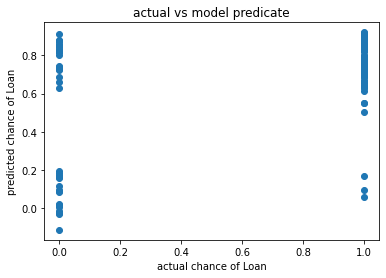

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual chance of Loan")
plt.ylabel("predicted chance of Loan")
plt.title('actual vs model predicate')
plt.show()

# Model evaluation

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [42]:
y_pred =regression.predict(x_test)

In [43]:
#MAE
mean_absolute_error(y_test,y_pred)

0.3149245382286142

In [44]:
#MSE
mean_squared_error(y_test,y_pred)

0.16331634204677586

In [45]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.404124166620577

# you have succesfully complete building linear Regression model

# Regularization

In [46]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [47]:
lasscv= LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [48]:
# best alpha parameter
alpha=lasscv.alpha_
alpha

0.0007445692764662368

In [49]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0007445692764662368)

In [50]:
lasso_reg.score(x_test,y_test)

0.21174472640707853

# using ridge regression model

In [51]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [52]:
ridgecv.alpha_

0.09099999999999998

In [53]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [54]:
ridge_model.score(x_test,y_test)

0.2095271383443872

# Finding relationship.We want to keep only those features which have relationship with label.

In [55]:
x=df_1.drop(columns=['Loan_Status'])
y=df_1['Loan_Status']

Before we fit our data to a model. Let's visualize the relationship between our independent variables and categories.

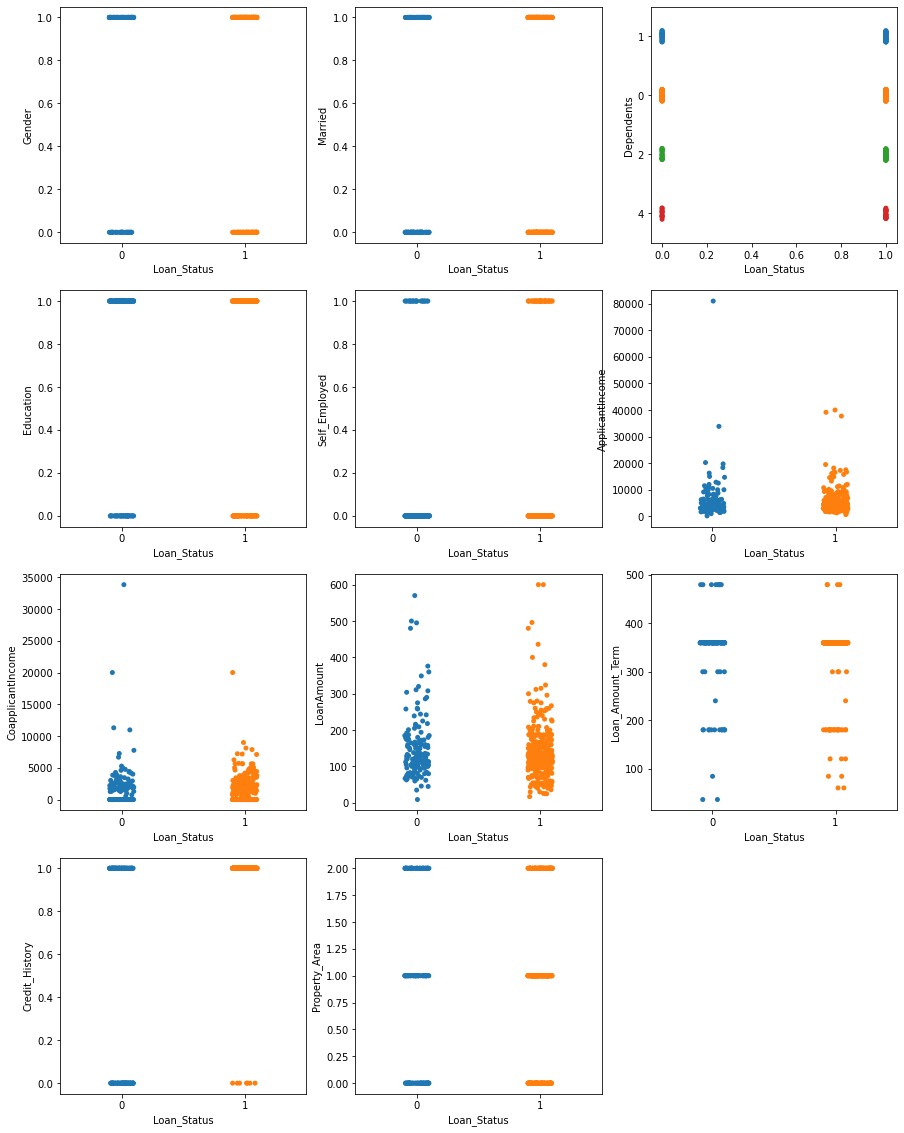

In [56]:
#Let's see how features are related to class
plt.figure(figsize=(15,20))
plotnumber = 1


for column in x:
    if plotnumber<=11 :  # as there are 8 columns in the data
        ax=plt.subplot(4,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.show()

# Check multicollinearity problem.Find if one feature is dependent on another feathure.

In [57]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

This is how our data looks now after scaling.Great,now we will check for multicollinearity usin VIF(variance inflation factor)

In [58]:
x_scaled.shape

(480, 11)

In [59]:
#Finding variance inflation factor in each scaled column i.e. x_scaled.shape[1] (1/1-R2)
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

#let's check the values
vif

,vif,features
0,1.181486,Gender
1,1.304776,Married
2,1.197062,Dependents
3,1.067544,Education
4,1.035767,Self_Employed
5,1.458116,ApplicantIncome
6,1.135441,CoapplicantIncome
7,1.541506,LoanAmount
8,1.040649,Loan_Amount_Term
9,1.013076,Credit_History


This is non multicollinearity problem.

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [84]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

let's see how our model performs on the test data set.

In [85]:
y_pred =log_reg.predict(x_test)

In [86]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [87]:
#model accuracy 
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8083333333333333

In [88]:
#Confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[12, 19],
       [ 4, 85]], dtype=int64)

# similarly you can manually calculate recall/precision/F1score

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.39      0.51        31
           1       0.82      0.96      0.88        89

    accuracy                           0.81       120
   macro avg       0.78      0.67      0.70       120
weighted avg       0.80      0.81      0.79       120



# Using selectKBest feature selection method

selectkBest use f_classif function to find best features,where f_classif uses ANOVA test.

In [60]:
from sklearn.feature_selection import SelectKBest,f_classif

In [61]:
x=df_1.drop('Loan_Status',axis=1)
y=df_1.Loan_Status

In [62]:
best_features = SelectKBest(score_func=f_classif,k=5)
fit = best_features.fit(x,y)
df_1scores=pd.DataFrame(fit.scores_)
df_1columns=pd.DataFrame(x.columns)

# concatenate dataframe
feature_scores =pd.concat([df_1columns,df_1scores],axis=1)
feature_scores.columns = ['feature_Name','score']  # name output columns
print(feature_scores.nlargest(5,'score')) 

     feature_Name       score
9  Credit_History  186.122727
1         Married    6.107491
7      LoanAmount    2.473684
3       Education    2.249320
0          Gender    1.997174


# Model Building

In [63]:
new_x = df_1[['Credit_History','Married','LoanAmount','Education','Gender']]

In [64]:
new_x

,Credit_History,Married,LoanAmount,Education,Gender
1,1.0,1,128.0,1,1
2,1.0,1,66.0,1,1
3,1.0,1,120.0,0,1
4,1.0,0,141.0,1,1
5,1.0,1,267.0,1,1
...,...,...,...,...,...
609,1.0,0,71.0,1,0
610,1.0,1,40.0,1,1
611,1.0,1,253.0,1,1
612,1.0,1,187.0,1,1


In [65]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(new_x)

In [66]:
# Building model to test unexposed data
x_train,x_test,y_train,y_test = train_test_split(x_scalar,y,test_size=0.25,random_state=355)

In [67]:
# Write one function  and call as many as times to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n==================Train Result==================")
        print(f"Accuracy score : {accuracy_score(y_train,y_pred)*100:0.2f}%")
              
    elif train==False:
              pred=clf.predict(x_test)
              
              
              print("\n==================Train Result==================")
              print(f"Accuracy score : {accuracy_score(y_train,y_pred)*100:0.2f}%")
              
              print('\n \n Test clssaification Report \n',classification_report(y_test,pred,digits=2)) ## Model confidence/accuracy

In [91]:
# Initiate KNeighborsClassifier
knn=KNeighborsClassifier()

# Model Training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [92]:
# Call the function and pass dataset to check train and test score
metric_score(knn,x_train,x_test,y_train,y_test,train=True)    # This is for training score
metric_score(knn,x_train,x_test,y_train,y_test,train=False)  #This is for test score


==================Train Result==================
Accuracy score : 81.67%

==================Train Result==================


UnboundLocalError: local variable 'y_pred' referenced before assignment

# KNN

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
# Print summary
print('shape    ------>',df_1.shape)
print('Each column and data type and its count','\n')
print(df_1.info())

shape    ------> (480, 12)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 48.8+ KB
None


# Cross validation

In [93]:
from sklearn.model_selection import KFold,cross_val_score

In [94]:
cross_val_score(knn,x_scalar,y,cv=5)

array([0.75      , 0.73958333, 0.72916667, 0.84375   , 0.80208333])

In [95]:
cross_val_score(KNeighborsClassifier(),x_scalar,y,cv=5).mean()

0.7729166666666667

# hyperparameter Tuning

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid = {'algorithm' : ['kd_tree','brute'],
              'leaf_size' : [3,5,6,7,8],
               'n_neighbors' : [3,5,7,9,11,13]
             }

In [98]:
gridsearch=GridSearchCV(estimator=knn,cv=3,param_grid=param_grid)

In [99]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})